
##**Modelos de Classificação**


Classificação de Doenças Cardíacas

Contexto


O conjunto de dados utilizado é o Statlog Heart Disease, disponível no repositório UCI. Ele
contém informações de 270 indivíduos e é composto por 14 colunas, selecionadas a partir de
um conjunto maior que continha 75 colunas. Nesse conjunto, não há valores ausentes.


O objetivo desse conjunto de dados é realizar uma tarefa de classificação, onde se deve
prever se uma pessoa tem ou não tem doença cardíaca. A variável de saída (o que queremos prever) é binária, sendo:


0: a pessoa não sofre de doença cardíaca.

1: a pessoa sofre de doença cardíaca.


Este é um estudo importante porque a saúde é um ponto vital de pesquisa para melhor ajudar
os pacientes com certas condições.
Além disso, a pressão arterial geralmente não apresenta
sintomas e, no entanto, se a pressão alta não for tratada, pode ser um grande contribuinte
para condições de saúde mais graves, como um derrame ou ataque cardíaco [2].


Dicionário de dados
Este banco de dados contém 13 atributos e uma variável de destino. Possui 8 valores nominais e 5
valores numéricos. A descrição detalhada de todos esses recursos é a seguinte:

● Age: idade dos pacientes em anos

● Sex: (Masculino: 1; Feminino: 0)

● cp: Tipo de dor torácica sentida pelo paciente. Este termo é categorizado em 4
categorias.

  ● 0 angina típica,

  ● 1 angina atípica,

  ● 2 dor não anginosa,

  ● 3 assintomática

● trestbps: nível de pressão arterial do paciente no modo de repouso em mm/HG

● chol: colesterol sérico em mg/dl

● fbs: Níveis de açúcar no sangue em jejum > 120 mg/dl representa 1 em caso de
verdadeiro e 0 como falso (Nominal)

● restecg: O resultado do eletrocardiograma em repouso é representado em 3 valores
distintos
0: Normal

● 1: com anormalidade da onda ST-T (inversões da onda T e/ou elevação ou depressão
do ST > 0,05 mV)

● 2: mostrando provável ou definitiva hipertrofia ventricular esquerda por Critérios de
Estes

● thalach: frequência cardíaca máxima alcançada

● exang: Angina induzida pelo exercício

● 0 retratando Não

● 1 retratando Sim

● oldpeak: Depressão do ST induzida pelo exercício em relação ao estado de repouso

● slope: segmento ST medido em termos de inclinação durante o pico do exercício

0: inclinação ascendente;

● 1: plano;

● 2: inclinação descendente

● ca: O número de vasos principais (0–3) (nominal)

● thal: Um distúrbio sanguíneo chamado talassemia
0: NULO

● 1: fluxo sanguíneo normal

● 2: defeito fixo (sem fluxo sanguíneo em alguma parte do coração)

● 3: defeito reversível (um fluxo sanguíneo é observado, mas não é normal (nominal)

● target: É a variável alvo que temos que prever 1 significa que o paciente sofre de
doença cardíaca e 0 significa que o paciente é normal



---



In [ ]:
# Manipulação dos dados em python
import pandas as pd
import numpy as np

# Visualizacao de dados
import seaborn as sns
import matplotlib.pyplot as plt

# Obter estatisticas de teste
from scipy import stats
import scipy.stats as stats
import statsmodels.api as sm

#Regressao Logistica
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Leitura dos dados csv
df = pd.read_csv("Heart_disease_statlog.csv")

In [ ]:
# Criar uma copia do DataFrame por seguranca
dfh = df.copy()

In [ ]:
dfh.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,3,130,322,0,2,109,0,2.4,1,3,1,1
1,67,0,2,115,564,0,2,160,0,1.6,1,0,3,0
2,57,1,1,124,261,0,0,141,0,0.3,0,0,3,1
3,64,1,3,128,263,0,0,105,1,0.2,1,1,3,0
4,74,0,1,120,269,0,2,121,1,0.2,0,1,1,0


In [ ]:
dfh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    int64  
 2   cp        270 non-null    int64  
 3   trestbps  270 non-null    int64  
 4   chol      270 non-null    int64  
 5   fbs       270 non-null    int64  
 6   restecg   270 non-null    int64  
 7   thalach   270 non-null    int64  
 8   exang     270 non-null    int64  
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    int64  
 11  ca        270 non-null    int64  
 12  thal      270 non-null    int64  
 13  target    270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB




---



#1.
**Análise Exploratória dos Dados**

Lista Analise Exploratoria:


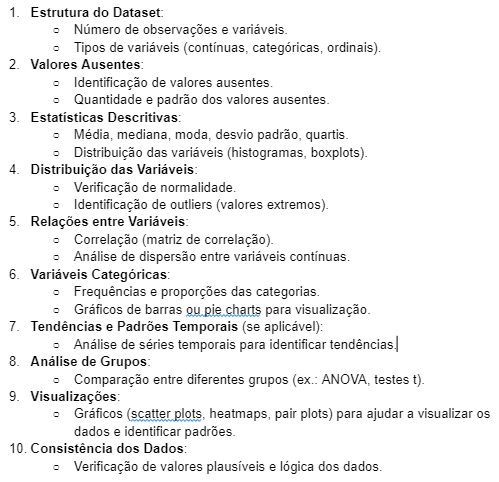

              age         sex          cp    trestbps        chol         fbs  \
count  270.000000  270.000000  270.000000  270.000000  270.000000  270.000000   
mean    54.433333    0.677778    2.174074  131.344444  249.659259    0.148148   
std      9.109067    0.468195    0.950090   17.861608   51.686237    0.355906   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    2.000000  120.000000  213.000000    0.000000   
50%     55.000000    1.000000    2.000000  130.000000  245.000000    0.000000   
75%     61.000000    1.000000    3.000000  140.000000  280.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang    oldpeak       slope          ca  \
count  270.000000  270.000000  270.000000  270.00000  270.000000  270.000000   
mean     1.022222  149.677778    0.329630    1.05000    0.585185    0.670370   
std      0.997891   23.165717 

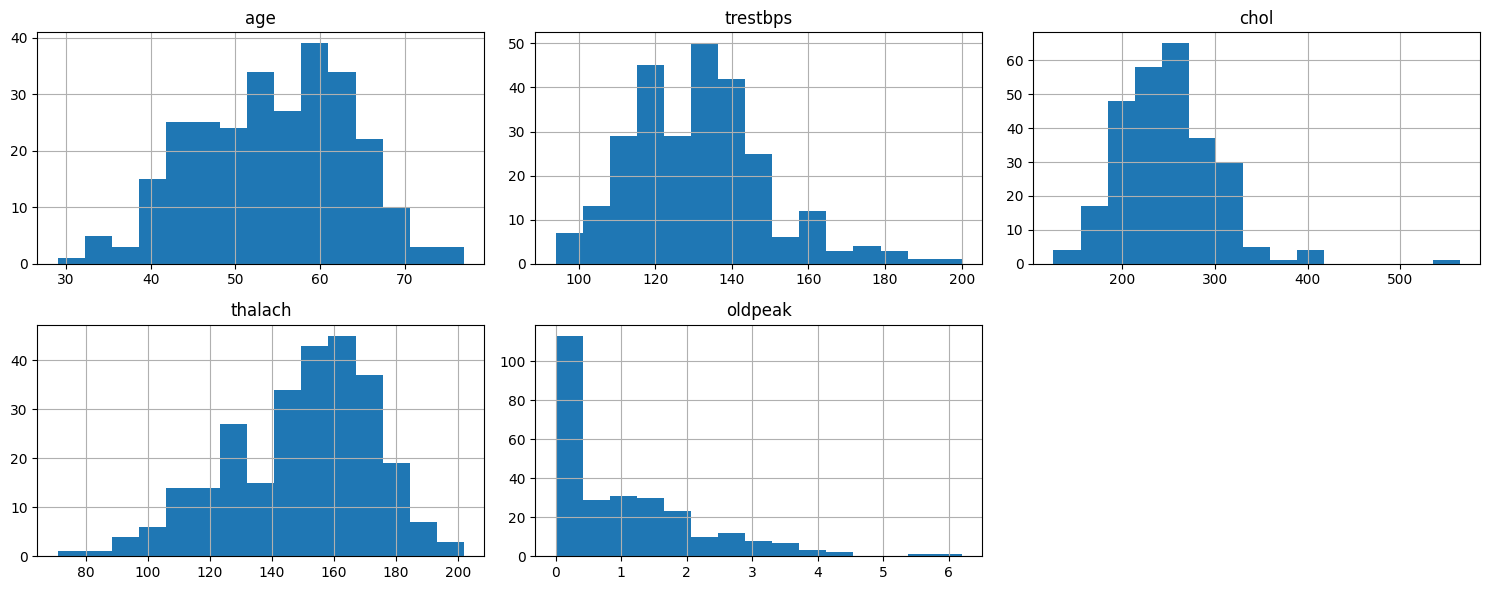

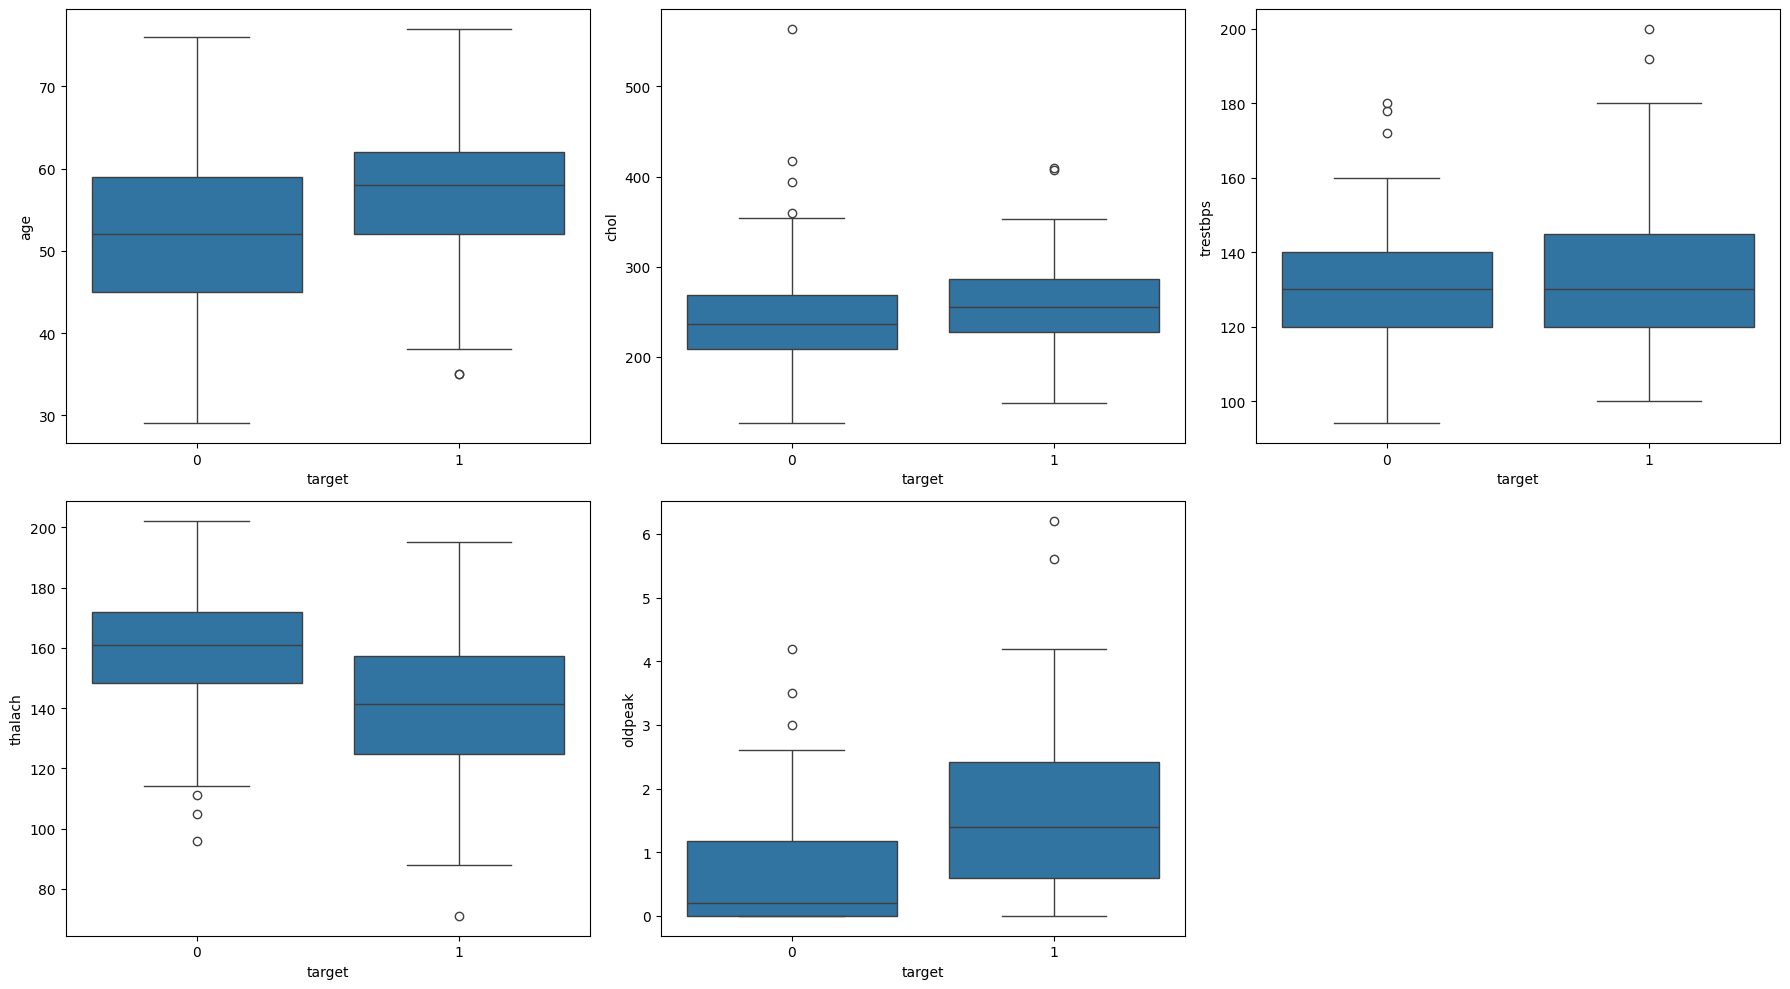

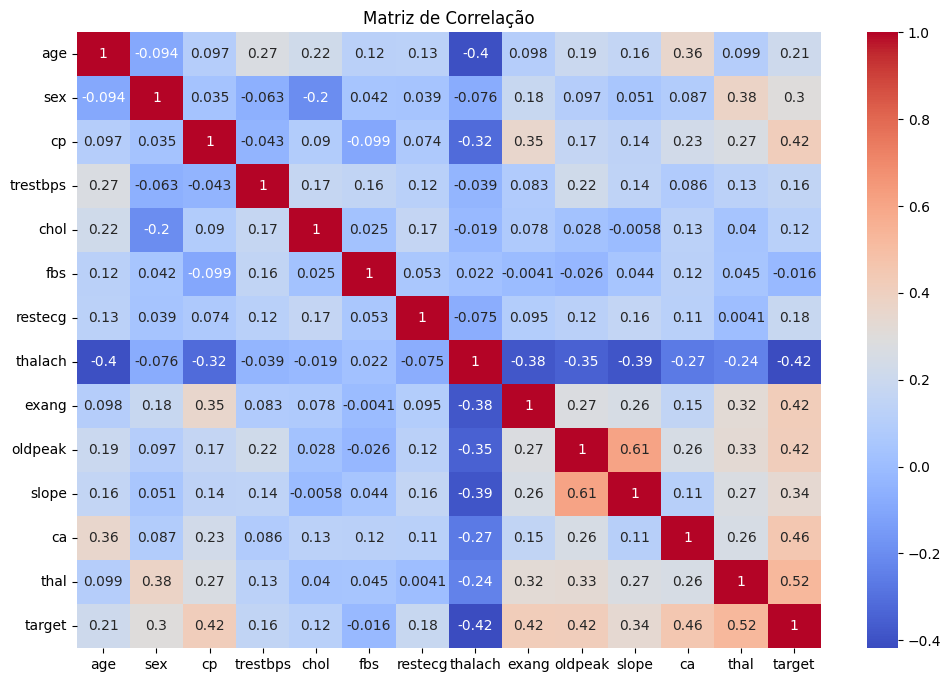

<Axes: xlabel='sex', ylabel='count'>

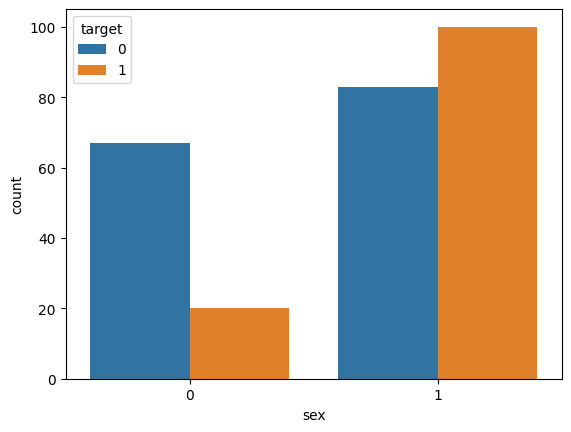

In [ ]:
# Estatísticas descritivas
print(dfh.describe())

# histograma p as variáveis numéricas


num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']  #colunas numericas

''' Age (idade): Idade dos pacientes em anos.

trestbps (pressão arterial em repouso): Nível de pressão arterial do paciente em repouso, medido em mm/HG.

chol (colesterol sérico): Nível de colesterol no sangue, medido em mg/dl.

thalach (frequência cardíaca máxima): Frequência cardíaca máxima atingida durante o exercício.

oldpeak (depressão do ST): Depressão do segmento ST induzida pelo exercício, em comparação com o estado de repouso.
'''
df[num_cols].hist(bins=15, figsize=(15, 6), layout=(2,3))
plt.tight_layout()
plt.show()

# Boxplot

fig, axes = plt.subplots(2,3, figsize=(18, 10))
sns.boxplot(x='target', y='age', data=df, ax=axes[0, 0])  # Boxplot de idade vs target
sns.boxplot(x='target', y='chol', data=df, ax=axes[0, 1])  # Boxplot de colesterol vs target
sns.boxplot(x='target', y='trestbps', data=df, ax=axes[0, 2])  # Boxplot de pressão arterial em repouso vs target
sns.boxplot(x='target', y='thalach', data=df, ax=axes[1, 0])  # Boxplot de frequência cardíaca máxima vs target
sns.boxplot(x='target', y='oldpeak', data=df, ax=axes[1, 1])  # Boxplot de oldpeak vs target
fig.delaxes(axes[1, 2])  # Remover o subplot vazio
plt.tight_layout()
plt.show()

# Matriz de correlação

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

# Contagem de categorias
sns.countplot(x='sex', hue='target', data=dfh)

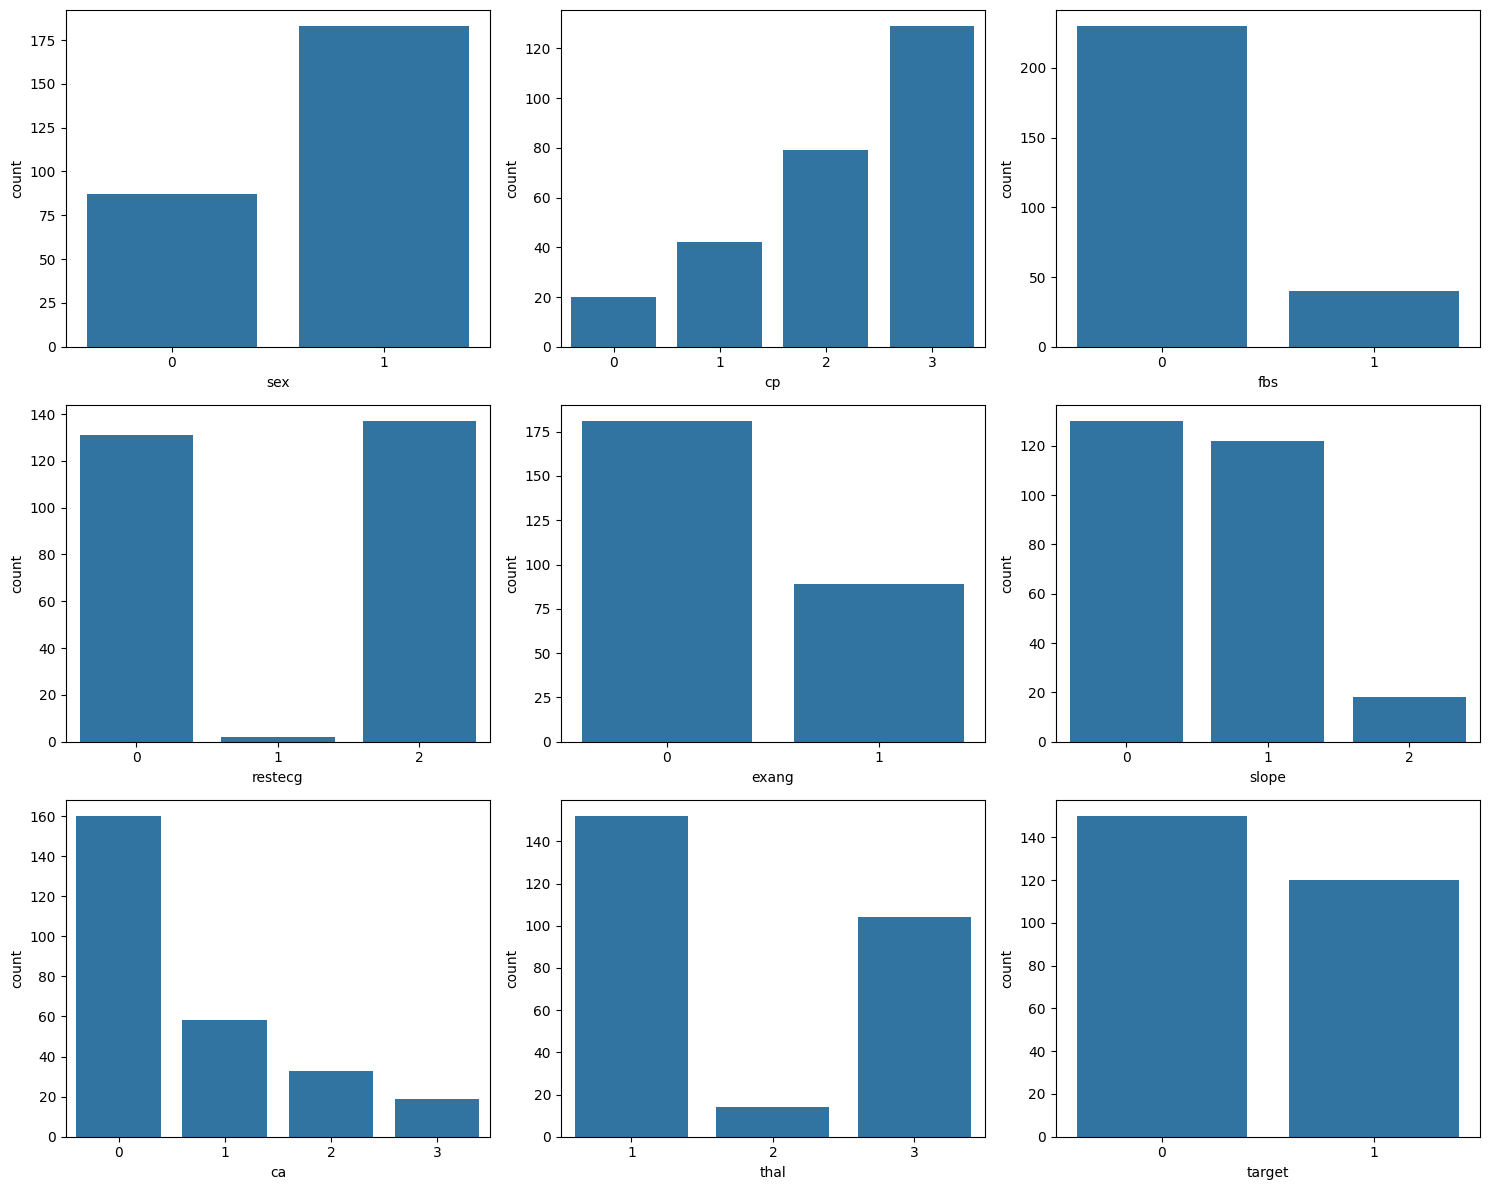

In [ ]:
#plotando os graficos de barra p variável categórica

cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

'''sex: Sexo do paciente, onde 1 representa masculino e 0 representa feminino.

cp (tipo de dor no peito): Tipo de dor torácica sentida pelo paciente, categorizada em:
0: angina típica
1: angina atípica
2: dor não anginosa
3: assintomática

fbs (nível de açúcar no sangue em jejum): Níveis de açúcar no sangue em jejum, onde 1 representa verdadeiro (nível > 120 mg/dl) e 0 representa falso.

restecg (resultado do eletrocardiograma em repouso): Resultado do eletrocardiograma em repouso, categorizado em:
0: normal
1: com anormalidade da onda ST-T (inversões da onda T e/ou elevação ou depressão do ST > 0,05 mV)
2: mostrando provável ou definitiva hipertrofia ventricular esquerda por critérios de Estes

exang (angina induzida pelo exercício): Angina induzida pelo exercício, onde 1 representa sim e 0 representa não.

slope (inclinação do segmento ST no pico do exercício): Inclinação do segmento ST medido durante o pico do exercício, categorizado em:
0: inclinação ascendente
1: plano
2: inclinação descendente

ca (número de vasos principais coloridos por fluoroscopia): Número de vasos principais (0-3) coloridos por fluoroscopia.

thal (talassemia): Tipo de talassemia, categorizada em:
0: NULO
1: fluxo sanguíneo normal
2: defeito fixo (sem fluxo sanguíneo em alguma parte do coração)
3: defeito reversível (um fluxo sanguíneo é observado, mas não é normal)

target (variável alvo): Variável que indica se o paciente sofre de doença cardíaca, onde 1 significa que o paciente sofre de doença cardíaca e 0 significa que o paciente é normal.
'''
fig, axes = plt.subplots(3,3, figsize=(15,12))
for i, col in enumerate(cat_cols):  # Iterando sobre as colunas categóricas
    sns.countplot(x=col, data=df, ax=axes[i//3, i%3]) # Criando gráficos de barras
plt.tight_layout()
plt.show()

#2.
Modelo de regressão logística para classificar se o indivíduo
sofre de doença cardíaca ou não.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
#separação das variáveis independentes (X) e dependente (y)
X = df.drop('target', axis=1) # aqui remove-se a coluna target do DataFrame e usa o resto como variáveis independentes
y = df['target']

#divisão treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% treino, 20% teste

#criando o moleo de regressão logística
model = LogisticRegression(max_iter=1000)

#treinando o modelo com os dados d treino
model.fit(X_train, y_train)

#previsões nos dados d teste
y_pred = model.predict(X_test)

#avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy}')

#relatório de classificação
print(classification_report(y_test, y_pred))

#matriz de confusão
print(confusion_matrix(y_test, y_pred))

Acurácia: 0.9259259259259259
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        33
           1       0.95      0.86      0.90        21

    accuracy                           0.93        54
   macro avg       0.93      0.91      0.92        54
weighted avg       0.93      0.93      0.93        54

[[32  1]
 [ 3 18]]


In [ ]:
dfh['target'].value_counts()

,count
target,
0,150
1,120


#3.
**Análise do resultado da regressão logística e plote a matriz de confusão**

*como a acurácia é 93%, isso significa que o modelo acertou 93% das previsões

*a precisão é de 91%, ou seja, 91% das previsões que o modelo fez como "sem doença cardíaca" (classe 0) estavam certas. E para classe 1 (com doença cardíaca), 95% das previsões estavam certas.

*recall é a proporção de verdadeiros positivos em relação ao total de verdadeiros. O modelo identificou de maneira correta que 97% das pessoas que realmente não têm doença cardíaca nao estao doentes. E acertou 86% das pessoas que têm doença cardíaca.

*F1-score é a média harmônica entre precisão e recall. Para classe 0, o f1 score é 94% e pra classe 1 é 90%.

*Suporte é o número de ocorrências reais de cada classe no conjunto de dados. 33 casos de pessoas sem doenças cardíacas e 21 casos com doenças.

*A matriz de confusão mostra que o modelo tem poucos falsos positivos e falsos negativos, indicando um bom desempenho na classificação de ambas as classes.


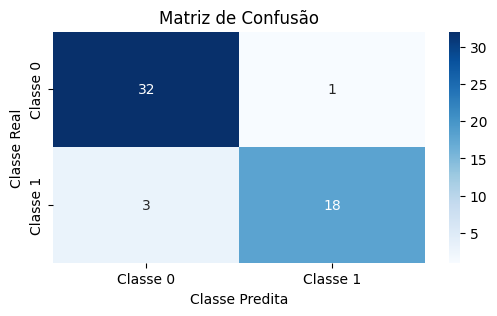

In [ ]:
# Definindo a matriz de confusão
confusion_matrix = np.array([[32, 1],
                              [3, 18]])

# Criando o gráfico
plt.figure(figsize=(6, 3))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])

# Adicionando rótulos e título
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()
